In [2]:
import os
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import csv 
import pandas as pd
import numpy as np
%matplotlib inline
from pandas import DataFrame, read_csv
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import scipy.special as sse
from scipy.stats import chisquare
from scipy.signal import savgol_filter

In [3]:
cd /Users/austinmcdonald/Desktop/data/NaI test/Test stand NaI/with_house/area1

/Users/austinmcdonald/Desktop/data/NaI test/Test stand NaI/with_house/area1


In [4]:
allFiles = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f,header=None) for f in allFiles), axis=1)
rows = len(df[0])
columns = len(allFiles)
new_length = rows*columns
areas = df.values.reshape(new_length,1)

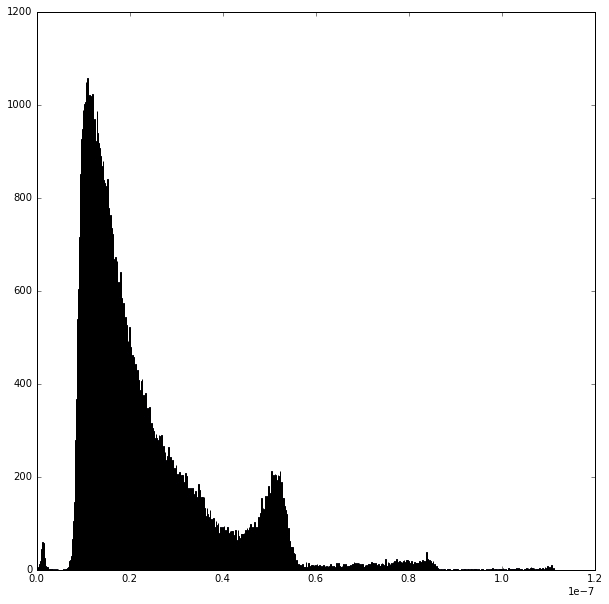

In [5]:
#Plotting Raw Data

nbins= 700
#nbins= 1000

hist, bin_edges = np.histogram(areas , nbins)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.figure(figsize=(10,10))
plt.hist(areas, bins=nbins)
areahist = np.histogram(areas, nbins) 
yaxis = areahist[0]
xaxis = areahist[1]
plt.show()

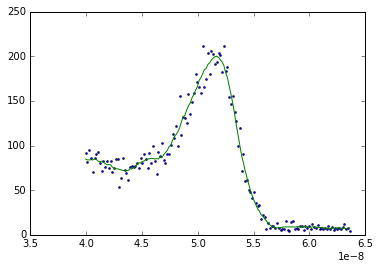

In [6]:
xcut = 250
ycut = 400

sm = savgol_filter(hist, 21, 3)
histtest = hist[xcut:ycut]
binctest = bin_centres[xcut:ycut]
smt = sm[xcut:ycut]
plt.plot(binctest,histtest,'o',markersize=2)
plt.plot(binctest,smt)

In [7]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
maxx = ycut-xcut

mtes = max(smt)
half = mtes/2
whr = np.where(smt==mtes)[0][0]
thebin = binctest[whr]
L = histtest[0:whr]
R = histtest[whr:maxx]
LP =find_nearest(L,half)
RP =find_nearest(R,half)
whereL = np.where(L==LP)[0][0]
whereR = np.where(R==RP)[0][0]
Lpoint = binctest[whereL]
Rpoint = binctest[whr+whereR]
fwhm = Rpoint-Lpoint
res = (fwhm/thebin) *100
print('fwhm =',fwhm)
print('res =',res)

fwhm = 6.03211782857e-09
res = 11.6653751434


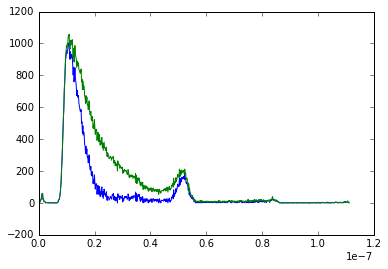

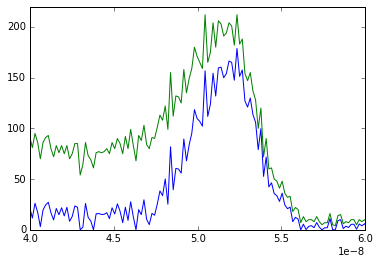

In [38]:
#Background Subtraction

LLS = []
LLS.append(np.log(np.log(np.sqrt(hist+1)+1)+1))   #LLS operator

m=12   #no. of iterations
w = np.zeros(len(LLS[0]))

for p in range(1,m):           #SNIP Algorithm
    for i in range(1,len(LLS[0])-p):
        a1 = LLS[0][i]
        a2 = (LLS[0][i-p]+LLS[0][i+p])/2
        w[i] = min(a1,a2)
    LLS[0] = w

bg = ((np.exp(np.exp(w)-1)-1)**2)-1    #Inverse LLS 

nobg = hist - bg

plt.plot(bin_centres,nobg)
plt.plot(bin_centres,hist)

plt.show()

plt.plot(bin_centres,nobg)
plt.plot(bin_centres,hist)
plt.xlim(.4e-7,.6e-7)
plt.ylim(0,220)
plt.show()



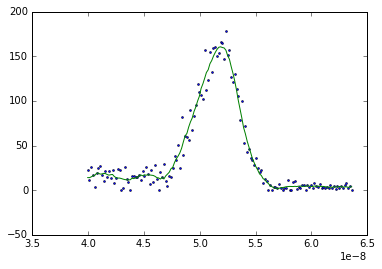

In [31]:
xcut2 = 250
ycut2 = 400

sm2 = savgol_filter(nobg, 21, 3)
histtest2 = nobg[xcut2:ycut2]
binctest = bin_centres[xcut2:ycut2]
smt2 = sm2[xcut2:ycut2]
plt.plot(binctest,histtest2,'o',markersize=2)
plt.plot(binctest,smt2)

In [33]:
maxx2 = ycut-xcut

mtes2 = max(smt2)
half2 = mtes2/2
whr2 = np.where(smt2==mtes2)[0][0]
thebin2 = binctest[whr2]
L2 = histtest2[0:whr2]
R2 = histtest2[whr2:maxx2]
LP2 =find_nearest(L2,half2)
RP2 =find_nearest(R2,half2)
whereL2 = np.where(L2==LP2)[0][0]
whereR2 = np.where(R2==RP2)[0][0]
Lpoint2 = binctest[whereL2]
Rpoint2 = binctest[whr2+whereR2]
fwhm2 = Rpoint2-Lpoint2
res2 = (fwhm2/thebin2) *100
print('fwhm2 =',fwhm2)
print('res2 =',res2)

fwhm2 = 5.23841811429e-09
res2 = 10.0994536992
